# Car Price Prediction using Machine Learning with Python

<b>Problem Statement:</b><br>
We have to predict the price of used car based on several features like present price, distance driven, fuel type, transmission type etc. 
<br>
This model will help both the car buyers and sellers to get the used car market value. <br>
<br>
<b> Understanding the Data:</b><br>
The data that we are going to use in this machine learning project is about the used price. Specifically contain information datapoint like current price, distance driven, fuel type, transmission etc. We would use the data analysis techniques to understand the data better and gain new insights. 


#### Mounting Google drive to import the required data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Colab Notebooks/Predictive-Analytics

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Predictive-Analytics


#### Importing the dependencies for this project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#### Data pre-processing

In [3]:
# Reading the data from the csv file to pandas dataframe
cardata = pd.read_csv("UsedCarData.csv")

In [4]:
#Inspecting the imported data
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking the shape/ number of data points
cardata.shape

(301, 9)

In [6]:
# Getting the information about the dataset/ Different columns and their datatypes
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking for missing/na values in the data set
cardata.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool

In [8]:
cardata.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool

No values are missing from the data set. 

In [25]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers.
cardata.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,1.000000,1.000000,1.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,1.000000,1.000000,1.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Checking the distribution of the categorical data
print(cardata.Fuel_Type.value_counts())
print("-------"*2)
print(cardata.Selling_type.value_counts())
print("-------"*2)
print(cardata.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
--------------
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
--------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


<ipython-input-11-f50f9cee246c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardata.corr(), annot=True, fmt='.2f')


<Axes: >

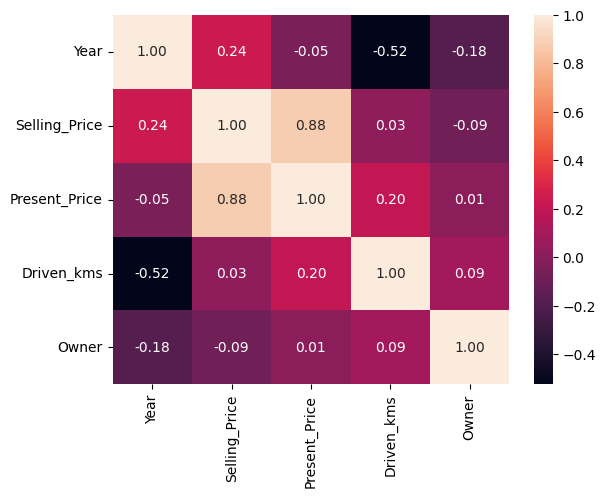

In [11]:
sns.heatmap(cardata[["Year", "Selling_Price", "Present_Price","Driven_kms", "Owner"]].corr(), annot=True, fmt='.2f')

The machine learning algorithms can not properly understand the text data, so we convert the categorical data into numrical data through encoding

In [12]:
# Encoding the categocial data
cardata.replace({'Fuel_Type':{'Petrol': 0,'Diesel':1,'CNG':2}}, inplace = True)
cardata.replace({'Selling_type':{'Dealer': 0,'Individual':1}}, inplace = True)
cardata.replace({'Transmission':{'Manual': 0,'Automatic':1}}, inplace = True)

In [13]:
cardata.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<Axes: >

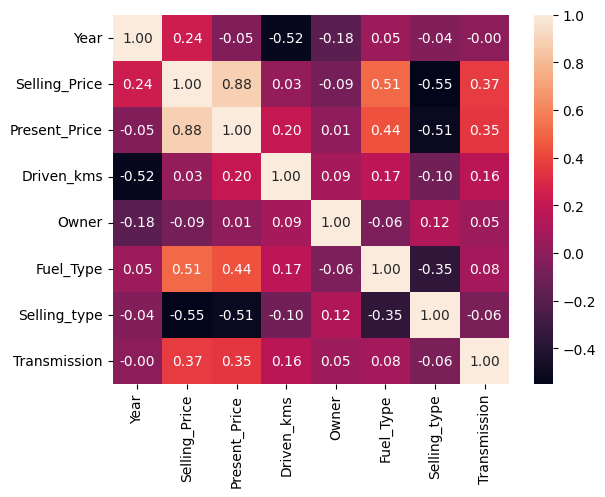

In [14]:
sns.heatmap(cardata[["Year", "Selling_Price", "Present_Price","Driven_kms", "Owner","Fuel_Type", "Selling_type","Transmission" ]].corr(), annot=True, fmt='.2f')

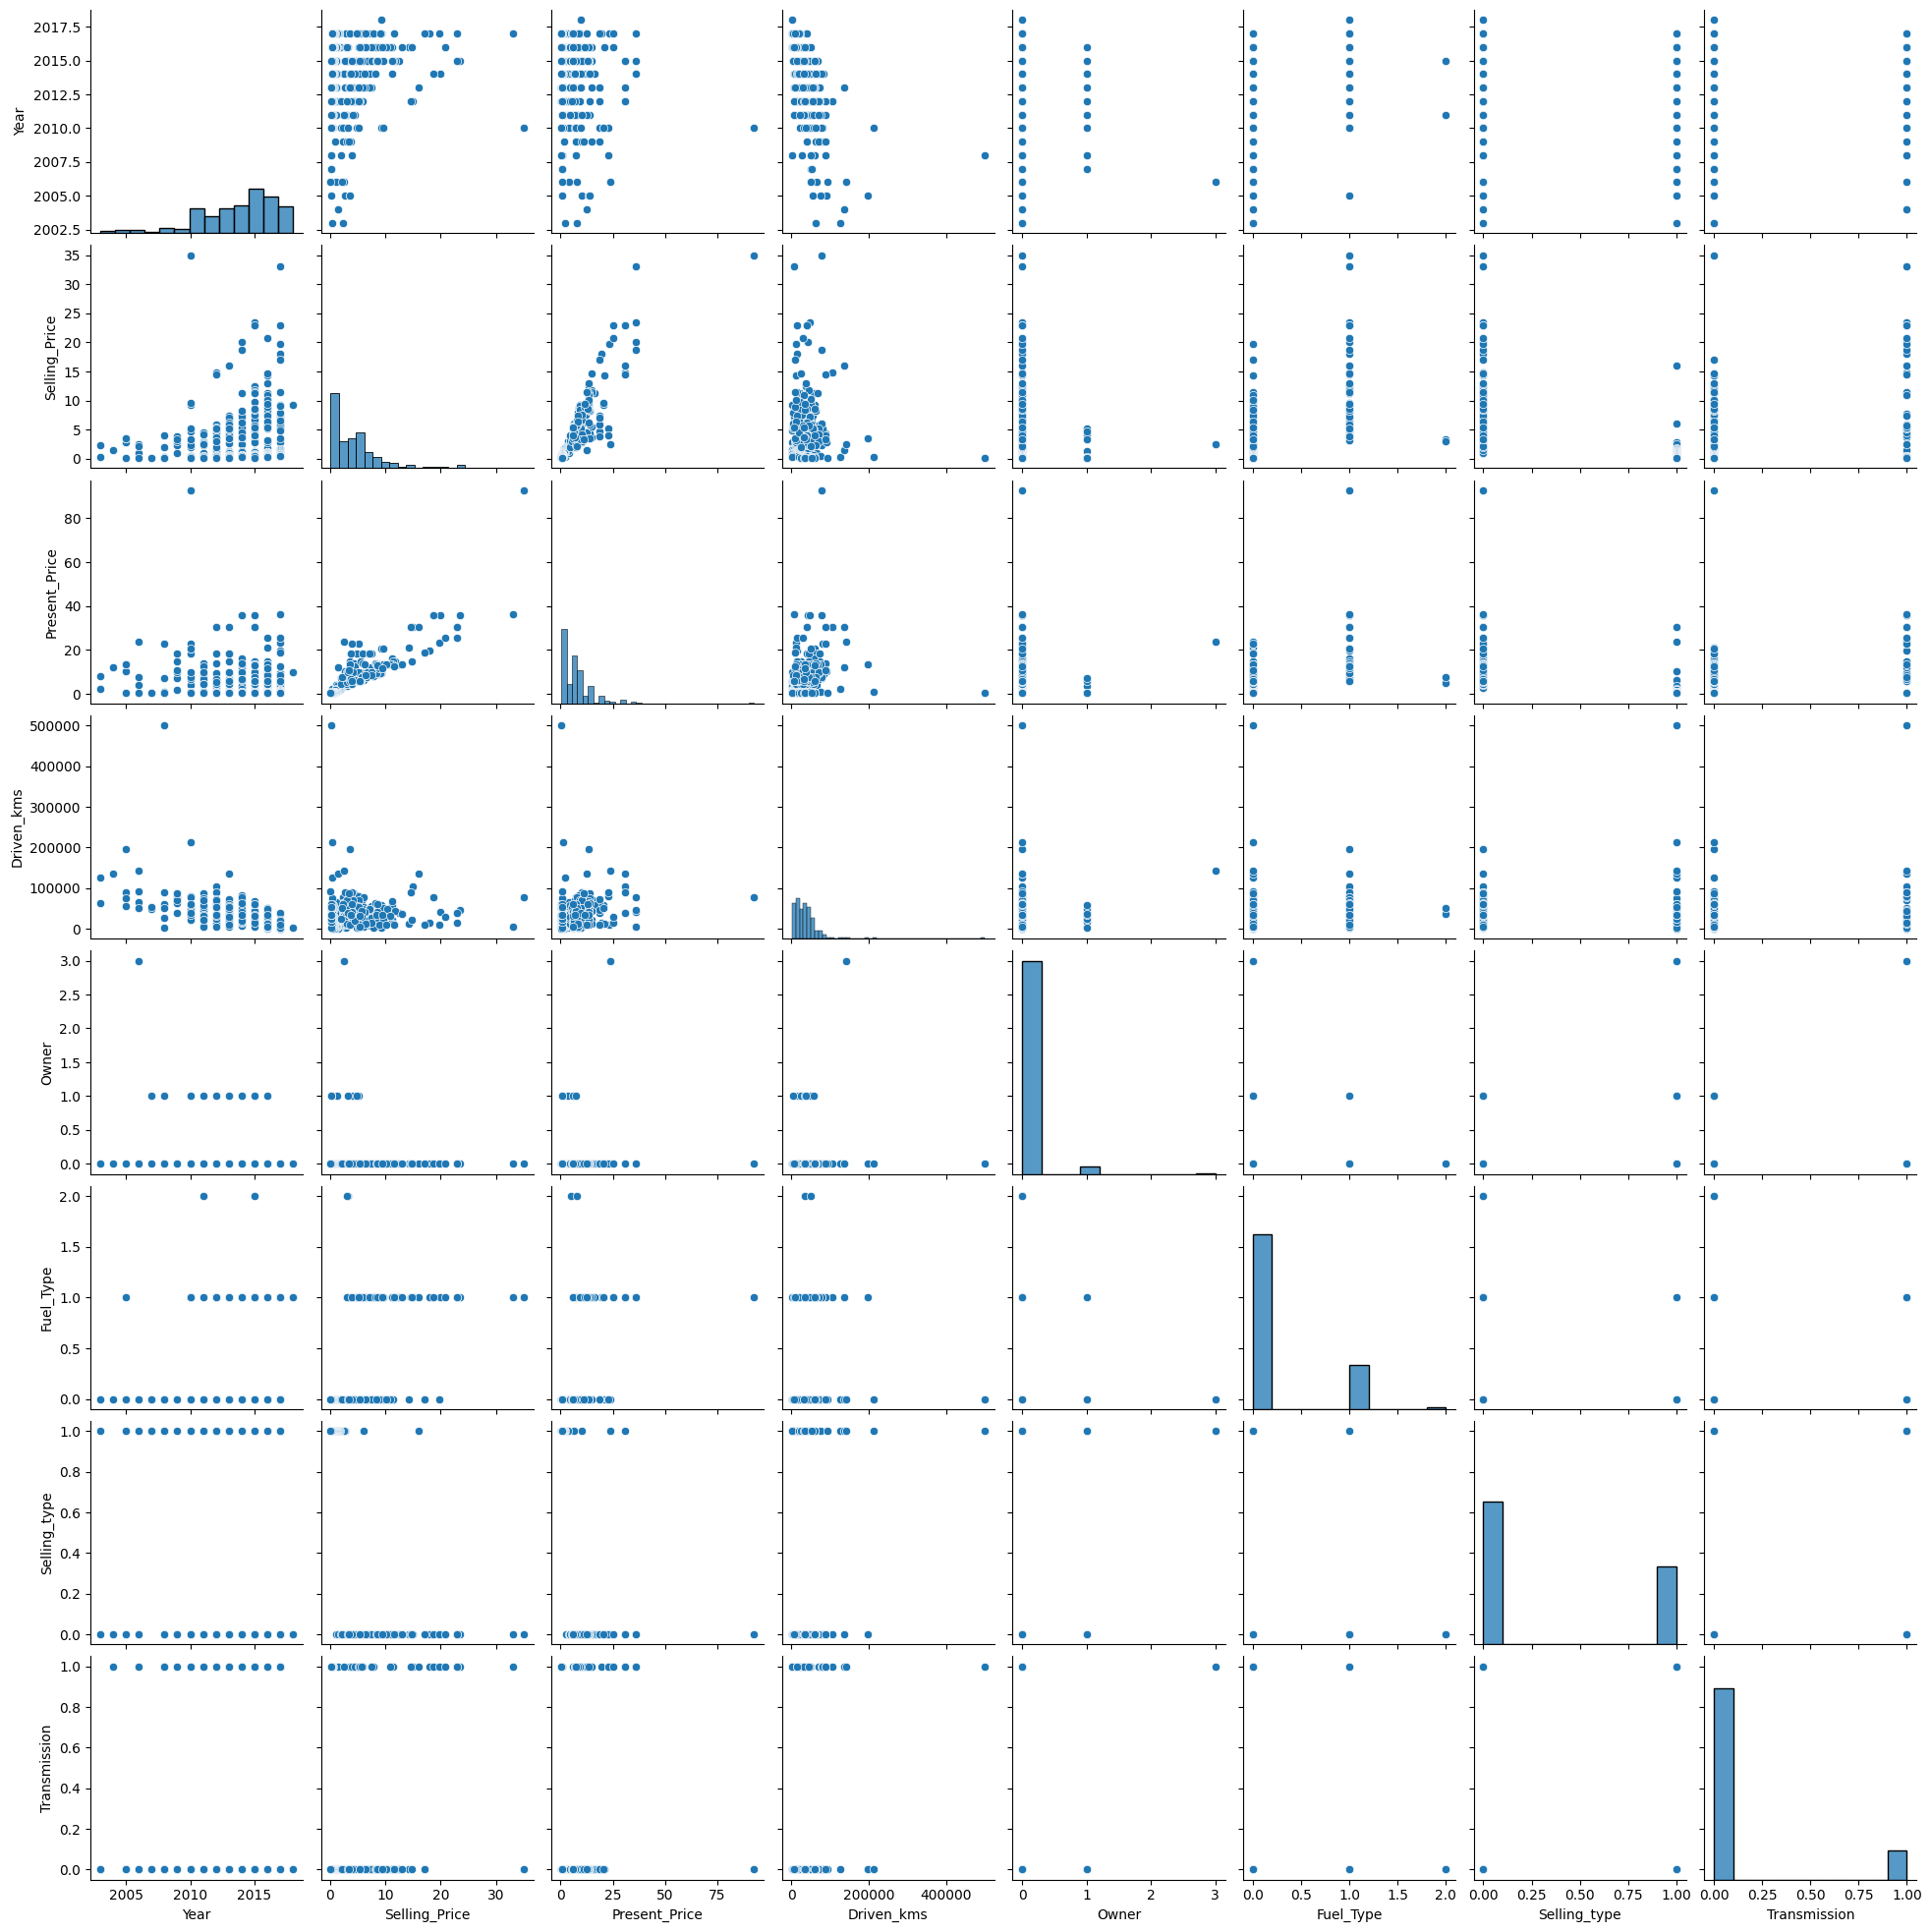

In [15]:
sns.pairplot(cardata[["Year", "Selling_Price", "Present_Price","Driven_kms", "Owner","Fuel_Type", "Selling_type","Transmission" ]])
plt.show()

From the pair plot, there are three interesting relationship that cameup
1. Selling price verses Current price
2. Selling price veres Year
3. Selling price veres distance driven

Creating the Scatter plot for these

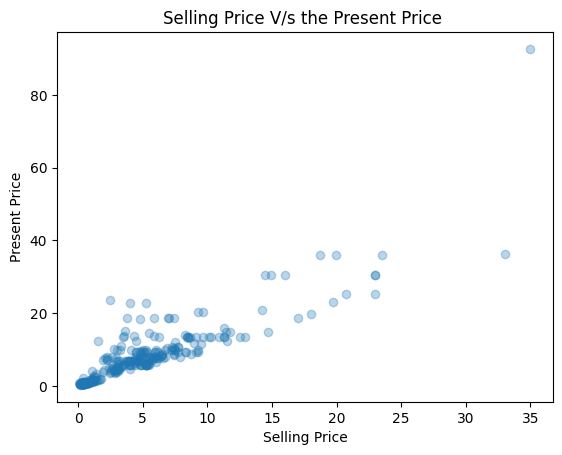

In [21]:
fig, ax = plt.subplots()

ax.scatter(
    cardata["Selling_Price"], 
    cardata["Present_Price"], 
    alpha=.3
);

ax.set_title("Selling Price V/s the Present Price ");
ax.set_ylabel("Present Price");
ax.set_xlabel("Selling Price");

#### Train & Test Data

We woudl define two variables X & Y where, X would be independent variables 
and Y would be the target variable (what are we trying to predict)

In [13]:
X = cardata.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = cardata["Selling_Price"]

In [14]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [15]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

We would now split the data into the train and test data

Since the data us very limited. we would keep the size of the test small


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#### Model Training

In [17]:
# Linear Regression Model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)


LinearRegression()

#### Model Evaluation

In [18]:
Y_predict = linear_regression_model.predict(X_test)

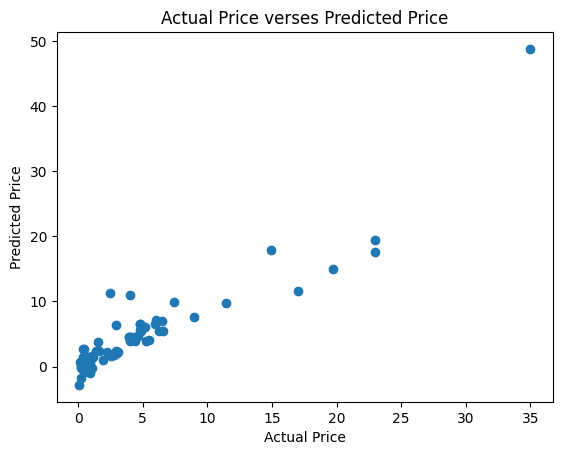

In [19]:
plt.scatter(Y_test, Y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price verses Predicted Price")
plt.show()

In [21]:
# R-Squared Value
errorsquared = metrics.r2_score(Y_test, Y_predict)
print(f"R-Squared Value: {errorsquared}")

R-Squared Value: 0.8031801156758386
